<a href="https://colab.research.google.com/github/jobathomas/u2202459---IB2AD0-Individual-Assignment/blob/main/Exploratory_Data_Analysis_Solar_Power_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below analysis refers to the following dataset: https://www.kaggle.com/datasets/pythonafroz/daily-power-production-data-of-solar-power-plant?resource=download

# Task
Analyze the 'Solar_Energy_Production.csv' dataset by loading it into a pandas DataFrame, inspecting its structure and data types, and converting relevant columns to datetime objects to extract the hour of the day. Visualize the daily variation in solar output using appropriate graphs such as line plots or box plots, ensuring clear labels and a legend, and then summarize the key findings regarding the daily patterns of solar energy production.

## Load Dataset

### Subtask:
Load the 'Solar_Energy_Production.csv' file into a pandas DataFrame to begin the analysis.


**Reasoning**:
Load the 'Solar_Energy_Production.csv' file into a pandas DataFrame and display its head to confirm successful loading and inspect the initial data structure.



In [1]:
import pandas as pd
df = pd.read_csv('/content/Solar_Energy_Production.csv')
df.head()

,name,id,address,date,kWh,public_url,installationDate,uid
0,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 08:00:00 AM,1.130,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 08:00:00
1,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 09:00:00 AM,2.340,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 09:00:00
2,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 10:00:00 AM,3.656,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 10:00:00
3,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 11:00:00 AM,4.577,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 11:00:00
4,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 12:00:00 PM,6.506,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 12:00:00


## Inspect Data and Preprocess

### Subtask:
Examine the dataset's structure, columns, and data types. Convert relevant columns to datetime objects and extract the hour of the day for analysis. Handle any missing values if necessary.


**Reasoning**:
The subtask requires examining the data structure and performing initial preprocessing steps like converting the 'date' column to datetime, extracting the hour, and checking for missing values. These operations are best done in a single code block to ensure efficient execution and a clear workflow.



In [2]:
print(df.info())
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %I:%M:%S %p')
df['hour'] = df['date'].dt.hour
print('\nMissing values per column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301231 entries, 0 to 301230
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              301231 non-null  object 
 1   id                301231 non-null  int64  
 2   address           301231 non-null  object 
 3   date              301231 non-null  object 
 4   kWh               301231 non-null  float64
 5   public_url        301231 non-null  object 
 6   installationDate  301231 non-null  object 
 7   uid               301231 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 18.4+ MB
None

Missing values per column:
name                0
id                  0
address             0
date                0
kWh                 0
public_url          0
installationDate    0
uid                 0
hour                0
dtype: int64


## Visualize Daily Solar Output

### Subtask:
Generate appropriate graphs (e.g., line plots or box plots) to visualize the variation in solar output during different hours of the day. Ensure plots include clear labels and a legend.


**Reasoning**:
To visualize the daily variation in solar output, I will import the necessary plotting libraries, calculate the average 'kWh' for each 'hour', and then generate a line plot with appropriate labels, title, and a grid for readability.



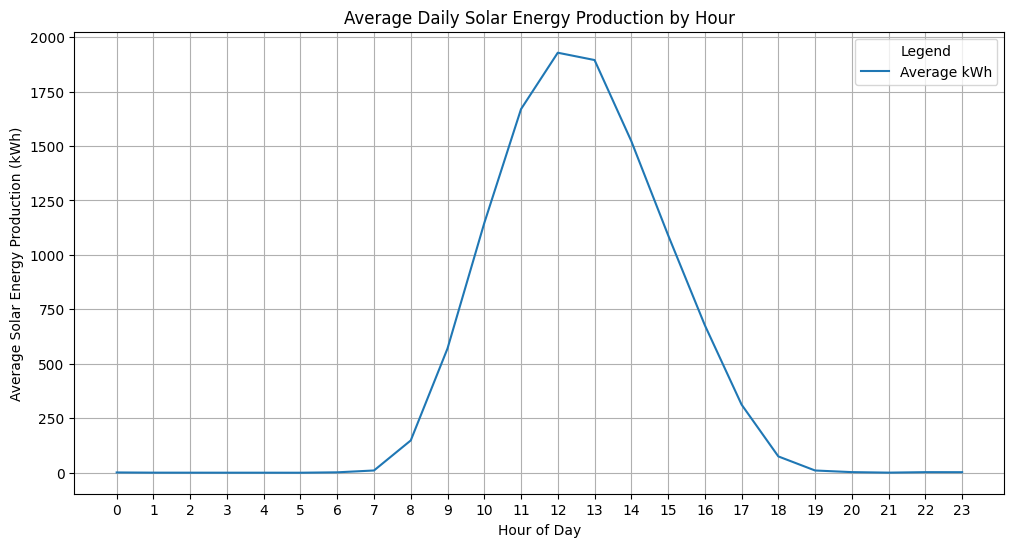

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_kwh_per_hour = df.groupby('hour')['kWh'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='kWh', data=avg_kwh_per_hour)
plt.title('Average Daily Solar Energy Production by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Solar Energy Production (kWh)')
plt.xticks(range(0, 24)) # Ensure all hours are displayed on the x-axis
plt.grid(True)
plt.legend(labels=['Average kWh'], title='Legend')
plt.show()

### Summary of Daily Solar Output

The line plot clearly illustrates the daily pattern of solar energy production. We can observe:

*   **Peak Production Hours**: Solar energy production starts to ramp up significantly from around 6-7 AM, reaches its peak during midday, typically between 11 AM and 2 PM, and then gradually declines.
*   **Zero or Low Production**: There is very little to no solar energy production during the night hours (from late evening until early morning), which is expected as solar panels require sunlight to generate electricity.
*   **Gradual Increase and Decrease**: The increase in production is relatively steep in the morning as the sun rises, and the decrease is also noticeable in the late afternoon as the sun sets.

This pattern is consistent with the availability of sunlight throughout the day, showing maximum output when the sun is highest in the sky and minimal or no output during darkness.

## Final Task

### Subtask:
Summarize the key findings from the exploratory data analysis, particularly regarding the daily patterns of solar output.


## Summary:

### Q&A
The key findings regarding the daily patterns of solar energy production are summarized below.

### Data Analysis Key Findings
*   The dataset, comprising 301,231 entries, was successfully loaded and preprocessed. The 'date' column was converted to datetime objects, and a new 'hour' column was extracted, with no missing values identified.
*   Solar energy production consistently starts to increase significantly around 6-7 AM.
*   Peak solar energy output is observed during midday, specifically between 11 AM and 2 PM.
*   Production gradually declines after the peak hours and continues through the late afternoon and evening.
*   Minimal to no solar energy production occurs during night hours (from late evening until early morning), which is expected due to the absence of sunlight.
*   The overall daily pattern of solar energy production directly correlates with the availability of sunlight, showing maximum output when the sun is highest in the sky and negligible output during darkness.

### Insights or Next Steps
*   This analysis clearly defines the operational window for maximizing solar energy capture, highlighting the importance of midday hours.
*   Further analysis could explore how these daily patterns vary across different seasons or under various weather conditions to provide a more comprehensive understanding of solar energy predictability.
